# Traccia T6b - Explainable ML
## Autore
* **Cupellaro Luca** 0365269
## Introduzione
Questo Notebook si propone di effettuare un'analisi di molteplici modelli di Machine Learning da applicare al data set "autoscout_prices1.csv". Tale data set è stato costruito per predire il prezzo delle automabili dato un dataset con 23 attributi:
Per prima cosa, si effettuerà un pre-processamento dei dati, in modo tale che le informazioni all'interno del data set siano ben rappresentate. Dopodiché, si considereranno diversi modelli di Machine Learning da applicare al data set e se ne valuteranno le relative prestazioni.

## Librerie importate
Le principali librerie Python utilizzate per lo svolgimento del progetto sono:
* **Matplotlib** per la creazione di grafici e la visualizzazione di dati;
* **Numpy** per eseguire operazioni matematiche su vettori e matrici;
* **Pandas** per effettuare inserimento, analisi e manipolazione di dati;
* **Seaborn** per la creazione di heatmap;
* **Skfda** per utilizzare e valutare il modello Nadaraya-Watson (richiede il comando _pip install scikit-fda_ per essere installata e importata);
* **Sklearn** per utilizzare e valutare gli altri modelli di Machine Learning.
**shap** per utilizzare e valutare gli altri modelli di Machine Learning.

In [2]:
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from IPython.display import display
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import matplotlib.pyplot as plt





Il file contenente il data set ("autoscout_prices1.csv") viene caricato, si contano il numero di righe e si elimianno le righe vuote se presenti.

In [6]:

# Carica il dataset
data = pd.read_csv("/home/luca/ProgrammiML/autoscout_prices1.csv", sep=',')
# Conta il numero di righe
numero_righe = len(data)
print(numero_righe)

# Visualizza le prime righe
display(data.head())


15915


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## Pre-processamento dei dati
Per prima cosa, è opportuno pre-processare i dati del nostro data set in modo tale che potranno essere trattati al meglio. 
In particolare:
* Le feature in totale sono 23  
* Di cui 2 sono interi
* 7 sono float
* Non esistono valori nulli in alcuna feature.


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [24]:
# Mostra tutti i conteggi
display(data["make_model"].value_counts())
display(data["body_type"].value_counts())
display(data["price"].value_counts())
display(data["vat"].value_counts())
display(data["km"].value_counts())
display(data["Type"].value_counts())
display(data["Fuel"].value_counts())
display(data["Gears"].value_counts())
display(data["Comfort_Convenience"].value_counts())
display(data["Entertainment_Media"].value_counts())
display(data["Extras"].value_counts())
display(data["Safety_Security"].value_counts())
display(data["age"].value_counts())
display(data["Previous_Owners"].value_counts())
display(data["hp_kW"].value_counts())
display(data["Inspection_new"].value_counts())

display(data["Paint_Type"].value_counts())
display(data["Upholstery_type"].value_counts())
display(data["Gearing_Type"].value_counts())
display(data["Displacement_cc"].value_counts())

display(data["Drive_chain"].value_counts())
display(data["cons_comb"].value_counts())


make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

price
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: count, Length: 2952, dtype: int64

vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

km
10.000000       1044
1647.362609      985
1.000000         367
5.000000         170
50.000000        148
                ... 
43197.000000       1
10027.000000       1
35882.000000       1
57840.000000       1
57.000000          1
Name: count, Length: 6691, dtype: int64

Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

Gears
6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: count, dtype: int64

Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   187
Ai

Entertainment_Media
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                      1737
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                  1134
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB        1009
On-board computer                                                                615
Radio                                                                            558
                                                                                ... 
Bluetooth,CD player,MP3                                                            1
CD player,USB                                                                      1
Bluetooth,CD player,Digital radio,Radio,USB                                        1
Bluetooth,CD player,Digital radio,MP3,On-board computer,Radio,Television,USB       1
Hands-free equipment,On-board computer,Radio,Sound system                          1
Name: count, Length: 346, dtype: int64

Extras
Alloy wheels                                                                                               5785
Alloy wheels,Touch screen                                                                                   697
Roof rack                                                                                                   595
Alloy wheels,Voice Control                                                                                  582
Alloy wheels,Touch screen,Voice Control                                                                     544
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                             

Safety_Security
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                  729
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                             480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure

age
1.0    4526
0.0    4433
3.0    3679
2.0    3277
Name: count, dtype: int64

Previous_Owners
1.0    14158
2.0     1172
0.0      554
3.0       29
4.0        2
Name: count, dtype: int64

hp_kW
85.0     2544
66.0     2121
81.0     1403
100.0    1316
110.0    1117
         ... 
75.0        1
132.0       1
115.0       1
195.0       1
133.0       1
Name: count, Length: 77, dtype: int64

Inspection_new
0    11983
1     3932
Name: count, dtype: int64

Paint_Type
Metallic       15246
Uni/basic        637
Perl effect       32
Name: count, dtype: int64

Upholstery_type
Cloth                12234
Part/Full Leather     3681
Name: count, dtype: int64

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

Displacement_cc
1598.0    5076
999.0     2465
1398.0    1387
1399.0     772
1461.0     682
          ... 
1369.0       1
1390.0       1
1195.0       1
2967.0       1
1800.0       1
Name: count, Length: 68, dtype: int64

Drive_chain
front    15707
4WD        204
rear         4
Name: count, dtype: int64

cons_comb
4.00    1020
5.60     963
5.40     900
5.00     810
4.70     766
        ... 
5.45       2
4.55       2
9.10       1
4.30       1
7.50       1
Name: count, Length: 62, dtype: int64

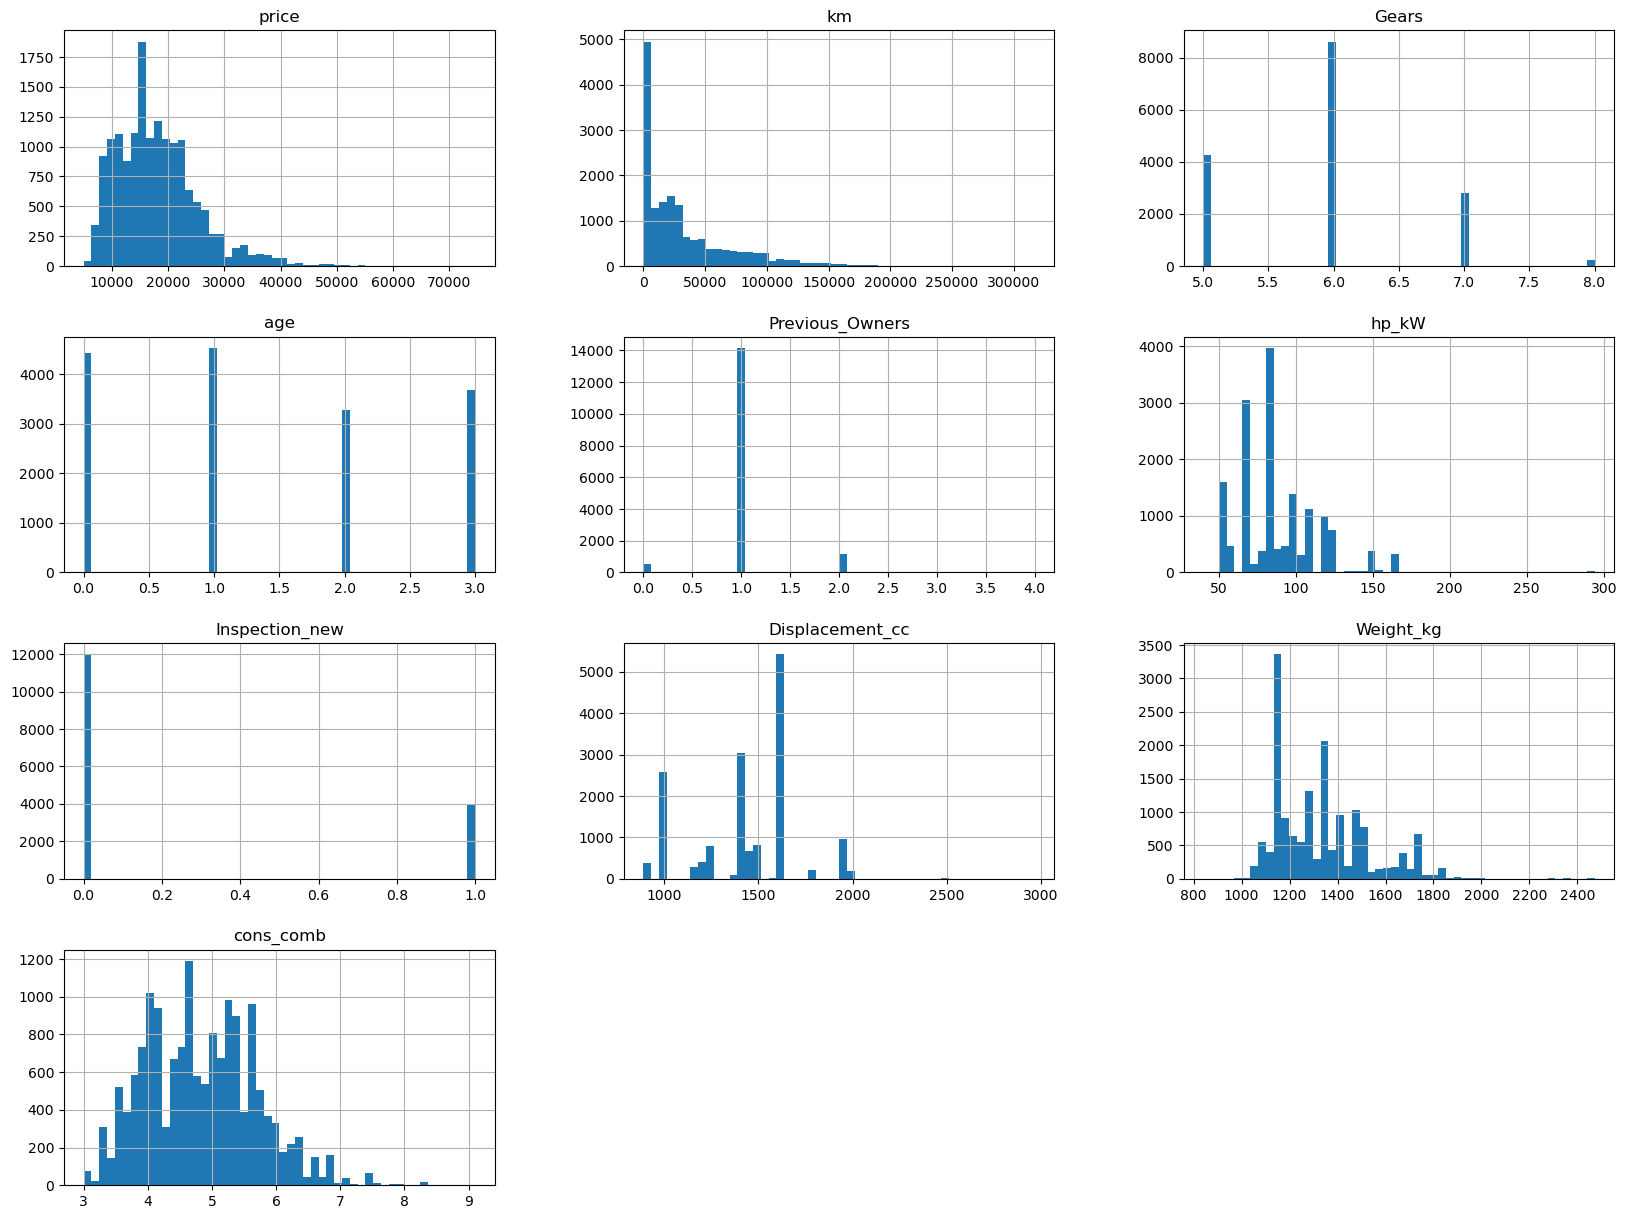

In [11]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

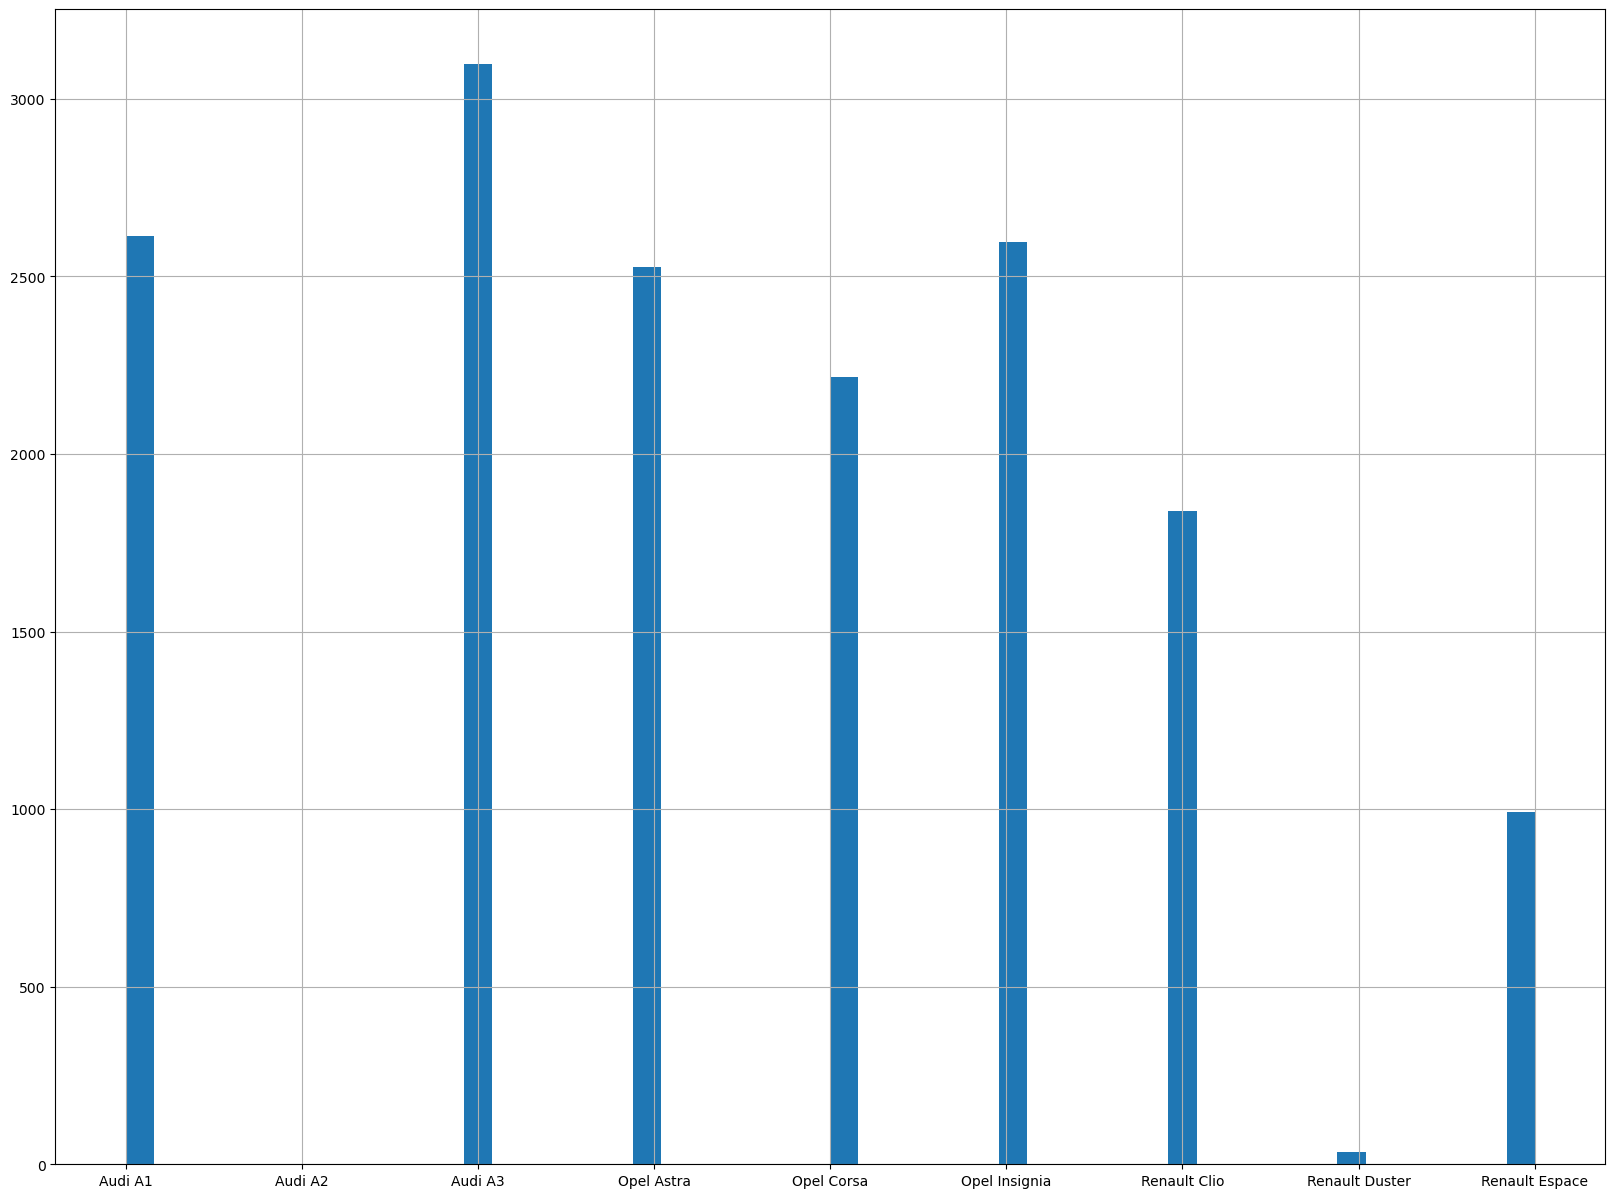

In [26]:
data["make_model"].hist(bins=50, figsize=(20, 15))

## Sampling
Variabili chiave per la stratificazione

Sulla base di questa analisi, ti consiglio di stratificare su queste variabili:

    # make_model: Per preservare la rappresentazione di tutti i modelli di auto.
      # Molto importante. Ha categorie sbilanciate e rappresenta modelli di veicoli. Stratifica per preservare tutti         modelli.
    body_type: Per garantire che tutti i tipi di carrozzeria siano proporzionalmente rappresentati.
       Importante. Contiene diverse tipologie di carrozzeria (es. Sedans, Coupe) con alcune classi rare che devono essere incluse.
    Type: Per mantenere le proporzioni tra "Used", "New", "Demonstration", ecc.
       Molto importante. Categorie come "Used", "New", "Demonstration" sono rilevanti e sbilanciate.
    Fuel: Per includere categorie rare come "Electric" o "LPG/CNG".
      Importante. Contiene classi rare come "Electric" o "LPG/CNG" che devono essere preservate.
    Drive_chain: Per garantire che tipi di trazione rari (es. "4WD") siano inclusi.
      Importante. Include classi come "front", "4WD", che sono rilevanti e devono essere preservate.

Si definiscono le feature X e la variabile target y

In [3]:

# 2. Definisci le feature (X) e la variabile target (y)
X = data.drop(columns=['price'])  # Feature: tutte le colonne tranne 'price'
y = data['price']  # Target: la colonna 'price'

### Normalizzazione delle feature


1. Range di Valori Diversi: Gli attributi come price, km, hp_kW (potenza in kilowatt), e Weight_kg (peso in kilogrammi) hanno range di valori molto diversi tra loro. Ad esempio, i prezzi delle auto possono variare di decine di migliaia di euro, mentre i valori di Gears (marce) sono generalmente in una scala da 5 a 9. Questa diversità nei range di valori può portare gli algoritmi di machine learning a pesare in modo improprio gli attributi con valori più alti, anche se non sono necessariamente più informativi.

2. Unità di Misura: Gli attributi come Displacement_cc (cilindrata in cc) e cons_comb (consumo combinato in litri/100 km) sono misurati in unità completamente diverse. Normalizzando questi valori, eliminiamo l'influenza delle unità di misura sul processo di apprendimento.

3. Facilità di Apprendimento: La maggior parte degli algoritmi di machine learning (come quelli basati su gradient descent) convergono più velocemente quando le feature sono su scale simili. La normalizzazione aiuta a prevenire problemi legati alla velocità di apprendimento e alla stabilità dell'algoritmo.

4. Trattamento Uniforme delle Feature: Le feature binarie come Previous_Owners, che tipicamente hanno valori 0 o 1, possono essere ingiustamente influenzate se confrontate con feature su scale molto più ampie. Normalizzandole tutte allo stesso range, ciascuna feature ha la stessa possibilità di influenzare l'apprendimento del modello.

Range Oscillanti dei Valori Normalizzati: Dopo la normalizzazione, tutti questi attributi oscillano tra 0 e 1:

0: Corrisponde al valore minimo presente nel dataset per quell'attributo.

1: Corrisponde al valore massimo presente nel dataset per quell'attributo.
Questo significa che qualsiasi valore intermedio può essere interpretato come una frazione del range totale di quel particolare attributo, rendendo i dati più omogenei e comparabili tra di loro.

Se desideri dettagli più specifici su questi range o ulteriori analisi, sono qui per assisterti!

In definitiva, poiché i valori di feature diverse risultano essere relativamente distanti tra loro (con qualche ordine di grandezza di differenza), è opportuno effettuare una normalizzazione delle feature. \
In particolare, verrà adottata una normalizzazione che riporterà i valori di tutte le feature all'interno dell'intervallo [0, 1], dove 0 corrisponde al valore minimo assunto da ciascuna feature, mentre 1 corrisponde al valore massimo. \
Sia $x$ il valore originale di una particolare feature $f$, sia $x'$ il valore ottenuto a seguito della normalizzazione e siano $min$, $max$ rispettivamente il valore minimo e il valore massimo assunti dalla feature f all'interno del data set. Allora, la normalizzazione avviene secondo la seguente formula:

$$ x' = \frac{x-min}{max-min} $$

In [4]:
# Mostra le statistiche prima della normalizzazione

# Definisci le colonne numeriche che vuoi normalizzare
numeric_cols = ['price', 'km', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']

print("Prima della normalizzazione:")
display(data[numeric_cols].describe())

# Applica la normalizzazione
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Mostra le statistiche dopo la normalizzazione
print("Dopo la normalizzazione:")
display(data[numeric_cols].describe())

Prima della normalizzazione:


,price,km,hp_kW,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,88.499340,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,26.674341,275.804272,199.682385,0.867530
min,4950.000000,0.000000,40.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,66.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,85.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,103.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,294.000000,2967.000000,2471.000000,9.100000


Dopo la normalizzazione:


,price,km,hp_kW,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,0.187715,0.101230,0.190942,0.259346,0.305151,0.300348
std,0.105982,0.116647,0.105017,0.132790,0.122429,0.142218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.113424,0.006058,0.102362,0.163216,0.199264,0.180328
50%,0.171572,0.064394,0.177165,0.274916,0.278970,0.295082
75%,0.243360,0.147950,0.248031,0.340876,0.387492,0.393443
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 1. Applica One-Hot Encoding su tutto il dataset
X_encoded = pd.get_dummies(X, drop_first=True)

### Suddivisione del data set in training+validation set e testing set
Quando si valuta un modello di Machine Learning, l'intero data set deve essere scomposto in 3 parti:
* **training set**: porzione del data set utilizzata per addestrare il modello;
* **validation set**: porzione del data set utilizzata per stabilire quali sono i valori degli iperparametri che portano il modello ad avere le prestazioni migliori.
* **testing set**: porzione del data set utilizzata per effettuare le predizioni, confrontare il valore vero col valore predetto del target di ciascun elemento e calcolare le prestazioni e la qualità del modello.

Stando alla documentazione di Sklearn, il data set viene tipicamente suddiviso secondo il seguente schema:
* Si ha una prima suddivisione statica in training+validation set e testing set: circa il 70-80% delle istanze andrebbe nel training+validation set, mentre il restante 20-30% andrebbe nel testing set. 

In [6]:

k = 5  # Usa 5-fold cross-validation

# Configurazione della cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Array per memorizzare i fold
folds = []

for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    folds.append((X_train, X_test, y_train, y_test))


## Valutazione dei modelli di Machine Learning per la classificazione

Gli algoritmi di Machine Learning di classificazione che verranno confrontati sul data set sono elencati qui di seguito:
* Modelli di Regressione Basati su Alberi
   * Random Forest Regressor
   * Gradient Boosting Regressor (GBR)
   * XGBoost
* Regresssioni lineari
  * Regressione Lineare Multipla
  *  Regressione Polinomiale
  *  Elastic Net (o Ridge/Lasso)
* Modelli Basati su Reti Neurali
    * Multi-Layer Perceptron (MLP)
* k-Nearest Neighbors (kNN)
* Approcci Bayesiani
    * Gaussian Process Regression
* Transformer

##### Per confrontare la bontà e le prestazioni di questi algoritmi, si ricorre alle seguenti metriche:
* MAE (Utile quando vuoi un’interpretazione semplice dell’errore medio.)
* MSE (Utile quando vuoi dare peso maggiore agli errori grandi)
* RMSE (Utile per interpretare l’errore medio in unità del target)
* R^2 Score (Per confrontare modelli e valutare la qualità complessiva del fit.)

##### Tecniche di Validazione tlizzata:
* Cross Validation


## Funzioni ausiliare

Funzione per l ottimizzazione dei parametri

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
Available GPUs: []


In [8]:

#ottimizzazone parametri
# Funzione per calcolare RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def optimize_model_with_metrics(model, param_grid, X, y, cv=3):
  
    assert not np.any(np.isnan(X))
    assert not np.any(np.isinf(X))
    assert not np.any(np.isnan(y))
    assert not np.any(np.isinf(y))

    # Impostazione della cross-validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Configurazione della GridSearchCV
    grid_search = GridSearchCV(
        model, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, error_score='raise'
    )

    # Addestramento del modello e ricerca dei parametri ottimali
    grid_search.fit(X, y)

    # Estrazione dei risultati
    all_metrics = {}
    for i, params in enumerate(grid_search.cv_results_['params']):
        mean_test_score = -grid_search.cv_results_['mean_test_score'][i]  # Convertire il punteggio MSE da negativo a positivo
        std_test_score = grid_search.cv_results_['std_test_score'][i]
        mae = np.sqrt(mean_test_score)  # Stima del MAE
        rmse_score = np.sqrt(mean_test_score)  # RMSE è la radice quadrata di MSE
        r2 = 1 - mean_test_score  # R² stimato

        # Salva le metriche per i parametri
        all_metrics[str(params)] = {
            "MSE": mean_test_score,
            "MAE": mae,
            "RMSE": rmse_score,
            "R2": r2,
            "Std Dev": std_test_score
        }

    # Miglior modello e parametri
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predizioni sul dataset completo
    y_pred = best_model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse_score = rmse(y, y_pred)

    # Stampa delle metriche migliori
    print(f"\nBest Parameters: {best_params}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse_score}")
    print(f"R^2 Score: {r2}")

    # Risultati per il miglior modello
    best_metrics = {
        "Best Params": best_params,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse_score,
        "R2": r2
    }

    print("Returning values:", best_model, all_metrics, best_metrics, y_pred)

    return best_model, all_metrics, best_metrics, y_pred








#calcolo_metriche_classificatore() è una funzione che esegue l'addestramento e la predizione per il classificatore
#passato in input, e ne calcola (e stampa) le metriche come la matrice di confusione, l'F1-score e l'accuracy.
#restituisce un dizionario contenente l'F1-score e l'accuracy ottenuti.
def calcolo_metriche_classificazione(classificatore, X, Y, X_test, Y_test):

    # Array per memorizzare le metriche di ogni fold
    risultati_fold = []
     # Itera sui fold
    for i, (X_train, X_test, y_train, y_test) in enumerate(folds):
        print(f"Fold {i+1}/{len(folds)}")
        
        # Addestramento del modello
        classificatore.fit(X, Y)
        
        # Predizione
        y_pred = classificatore.predict(X_test)
        
        # Calcolo metriche
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Salva i risultati del fold
        risultati_fold.append({'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
        
        # Stampa le metriche per il fold corrente
        print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")
 
 # Calcolo delle metriche complessive
    mae_media = np.mean([r['MAE'] for r in risultati_fold])
    mse_media = np.mean([r['MSE'] for r in risultati_fold])
    rmse_media = np.mean([r['RMSE'] for r in risultati_fold])
    r2_media = np.mean([r['R2'] for r in risultati_fold])
    
    # Stampa dei risultati finali
    print("\nRisultati Finali della Cross-Validation:")
    print(f"MAE Medio: {mae_media:.4f}")
    print(f"MSE Medio: {mse_media:.4f}")
    print(f"RMSE Medio: {rmse_media:.4f}")
    print(f"R2 Medio: {r2_media:.4f}") 




In [9]:
#dichiarazione di un dizionario che conterrà le coppie {MAE,MSE,RMSE,R^2}
#relative alle predizioni effettuate dal classificatore migliore (wrt iperparametri) per ciascun modello, dove le
#predizioni vengono fatte sul testing set a seguito di un addestramento effettuato sul training+validation set
dizionario_result={}

## Plotting dei Grafici

Funzione per l ottimizzazione dei parametri

In [10]:
def plot_combined_metrics_fixed(metrics_df, fixed_param, fixed_value, varying_param, title_prefix):
  
    metrics = ["MAE", "MSE", "R2"]  # Le metriche da plottare
    
    # Filtra il DataFrame per il parametro fisso
    filtered_df = metrics_df[metrics_df[fixed_param] == fixed_value]
    
    plt.figure(figsize=(5, 4))
    for metric in metrics:
        plt.plot(filtered_df[varying_param], filtered_df[metric], marker="o", label=metric)
    
    plt.title(f"{title_prefix}: Confronto MAE, MSE, R2 (fissato {fixed_param}={fixed_value})")
    plt.xlabel(varying_param)
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.show()



def PlottingValori(y_test, y_pred, title="Valori Reali vs Valori Predetti"):
   
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, s=4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonale ideale
    plt.xlabel("Valori Reali")
    plt.ylabel("Valori Predetti")
    plt.title(title)
    plt.grid(True)
    plt.show()




## Random Forest Regressor

In [ ]:
#modello senza ottimizzazione dei parametri
# Inizializzazione del classificatore Random Forest
RFC = RandomForestClassifier()
calcolo_metriche_classificazione(RFC,X_train,y_train, X_test,y_test)

#modello con ottimizzazione dei parametri
# Creazione della griglia di iperparametri
n_estimators_list = [i for i in range(50, 301, 50)]  
max_depth_list = [i for i in range(5, 31, 5)]  

param_grid = {
    "n_estimators": n_estimators_list,
    "max_depth": max_depth_list
}

best_model, all_metrics, best_metrics, y_pred = optimize_model_with_metrics(RFC, param_grid, X_train, y_train)



# Salvataggio dei risultati in un dizionario
dizionario_result["RFC"] = best_metrics



Valutazione del Modello:
----------------------------
Mean Absolute Error (MAE): 1221.2224
Mean Squared Error (MSE): 5467585.6252
Root Mean Squared Error (RMSE): 2338.2869
R^2 Score: 0.9029

Best Parameters: {'max_depth': 30, 'n_estimators': 100}
MAE: 827.0820766572416
MSE: 7820258.576735784
RMSE: 2796.4725238656974
R^2 Score: 0.855237914948064


ValueError: not enough values to unpack (expected 4, got 3)

In [18]:

# Estrai i migliori parametri da best_metrics
best_n_estimators = best_metrics["Best Params"]["n_estimators"]
best_max_depth = best_metrics["Best Params"]["max_depth"]
# Richiamo della fnzione per plottare i grafici delle metrche
plot_combined_metrics_fixed(
    metrics_df=all_metrics,
    fixed_param="max_depth",
    fixed_value=best_max_depth,
    varying_param="n_estimators",
    title_prefix="Confronto per n_estimators"
)

# Grafico combinato con n_estimators fissato e max_depth variabile
plot_combined_metrics_fixed(
    metrics_df=all_metrics,
    fixed_param="n_estimators",
    fixed_value=best_n_estimators,
    varying_param="max_depth",
    title_prefix="Confronto per max_depth"
)

#PlottingValori(y_test,Y_pred)


KeyError: 'max_depth'

## XGBOOST

In [28]:
#modello senza ottimizzazione dei parametri
# Inizializzazione del classificatore Random Forest
XGB = XGBRegressor()
calcolo_metriche_classificazione(XGB,X_train,y_train, X_test,y_test)

#modello con ottimizzazione dei parametri
# Creazione della griglia di iperparametri
n_estimators_list = [i for i in range(50, 301, 50)]  
max_depth_list = [i for i in range(5, 31, 5)]  

param_grid = {
    "n_estimators": n_estimators_list,
    "max_depth": max_depth_list
}


# Ottimizzazione del modello
best_model,all_metrics,best_metrics = optimize_model_with_metrics(XGB, param_grid, X_train, y_train)

# Salvataggio dei risultati in un dizionario
#display(best_metrics)
dizionario_result["XGB"] = best_metrics





Valutazione del Modello:
----------------------------
Mean Absolute Error (MAE): 1115.1441
Mean Squared Error (MSE): 3224501.7811
Root Mean Squared Error (RMSE): 1795.6898
R^2 Score: 0.9427
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
MAE: 519.8070186096057
MSE: 473002.88837518956
RMSE: 687.7520544318203
R^2 Score: 0.9912441662018084


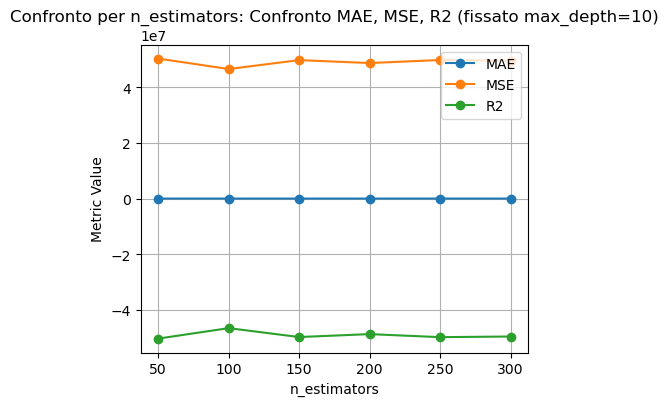

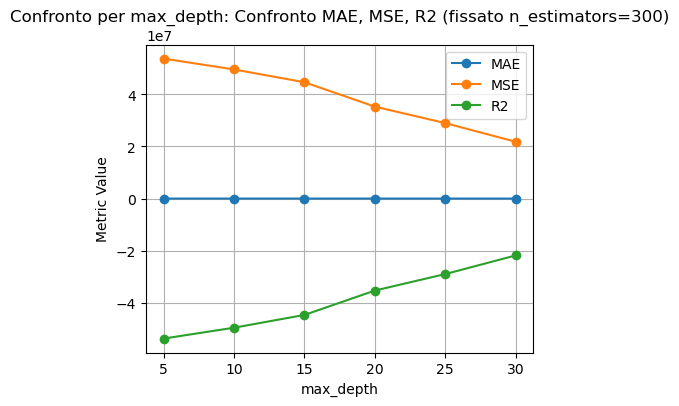

In [ ]:

# Richiamo della funzione per plottare i grafici delle metrche
plot_combined_metrics_fixed(
    metrics_df=metrics_df,
    fixed_param="max_depth",
    fixed_value=best_max_depth,
    varying_param="n_estimators",
    title_prefix="Confronto per n_estimators"
)

# Grafico combinato con n_estimators fissato e max_depth variabile
plot_combined_metrics_fixed(
    metrics_df=metrics_df,
    fixed_param="n_estimators",
    fixed_value=best_n_estimators,
    varying_param="max_depth",
    title_prefix="Confronto per max_depth"
)

In [19]:

# Importanza delle feature
importanza = model.feature_importances_
feature_names = X_train_encoded.columns  # Nomi delle feature

# Crea un DataFrame per visualizzare l'importanza
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importanza
})

# Ordina per importanza
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
4,hp_kW,0.140963
16,make_model_Renault Espace,0.111234
2,age,0.080485
10,make_model_Audi A3,0.052071
7100,"Extras_Alloy wheels,Voice Control",0.046927
...,...,...
3987,"Comfort_Convenience_Air conditioning,Automatic...",0.000000
3988,"Comfort_Convenience_Air conditioning,Automatic...",0.000000
3989,"Comfort_Convenience_Air conditioning,Automatic...",0.000000
3990,"Comfort_Convenience_Air conditioning,Automatic...",0.000000


In [20]:
# Adapt data for**SHAP Analysis**

print(X_train_encoded.dtypes)
bool_columns = X_train_encoded.select_dtypes(include=['bool']).columns
X_train_encoded[bool_columns] = X_train_encoded[bool_columns].astype(int)
X_test_encoded[bool_columns] = X_test_encoded[bool_columns].astype(int)
print("dati aggiornati\n")
print(X_train_encoded.dtypes)

km                                   float64
Gears                                float64
age                                  float64
Previous_Owners                      float64
hp_kW                                float64
                                      ...   
Upholstery_type_Part/Full Leather       bool
Gearing_Type_Manual                     bool
Gearing_Type_Semi-automatic             bool
Drive_chain_front                       bool
Drive_chain_rear                        bool
Length: 11678, dtype: object
dati aggiornati

km                                   float64
Gears                                float64
age                                  float64
Previous_Owners                      float64
hp_kW                                float64
                                      ...   
Upholstery_type_Part/Full Leather      int32
Gearing_Type_Manual                    int32
Gearing_Type_Semi-automatic            int32
Drive_chain_front                      int32
Drive_cha

c:\Users\testy\anaconda3\envs\test\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


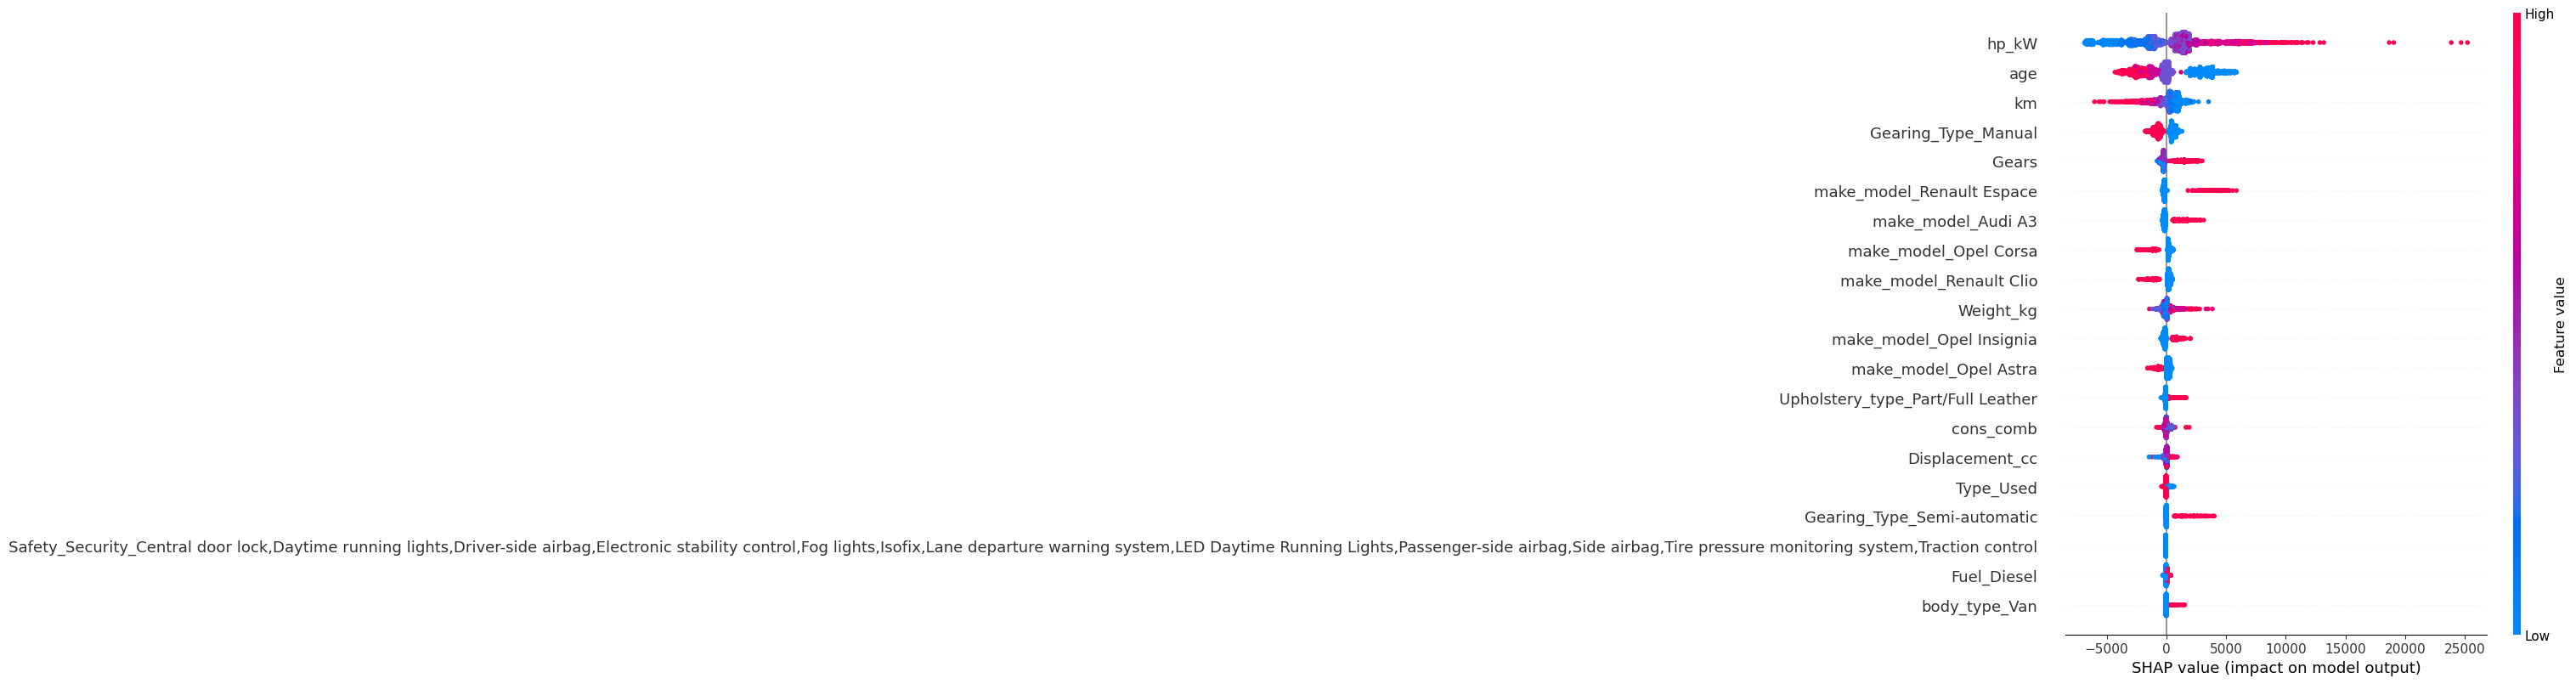

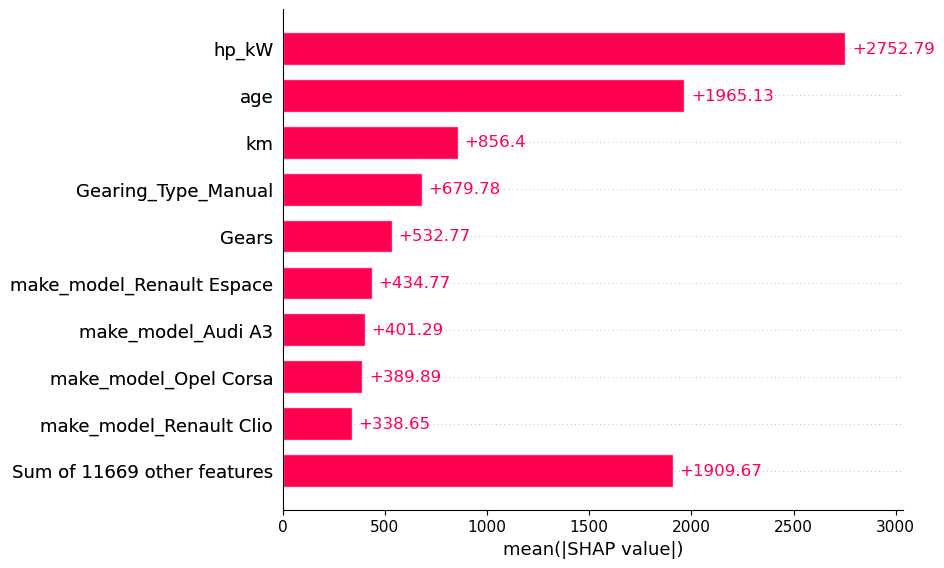

c:\Users\testy\anaconda3\envs\test\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


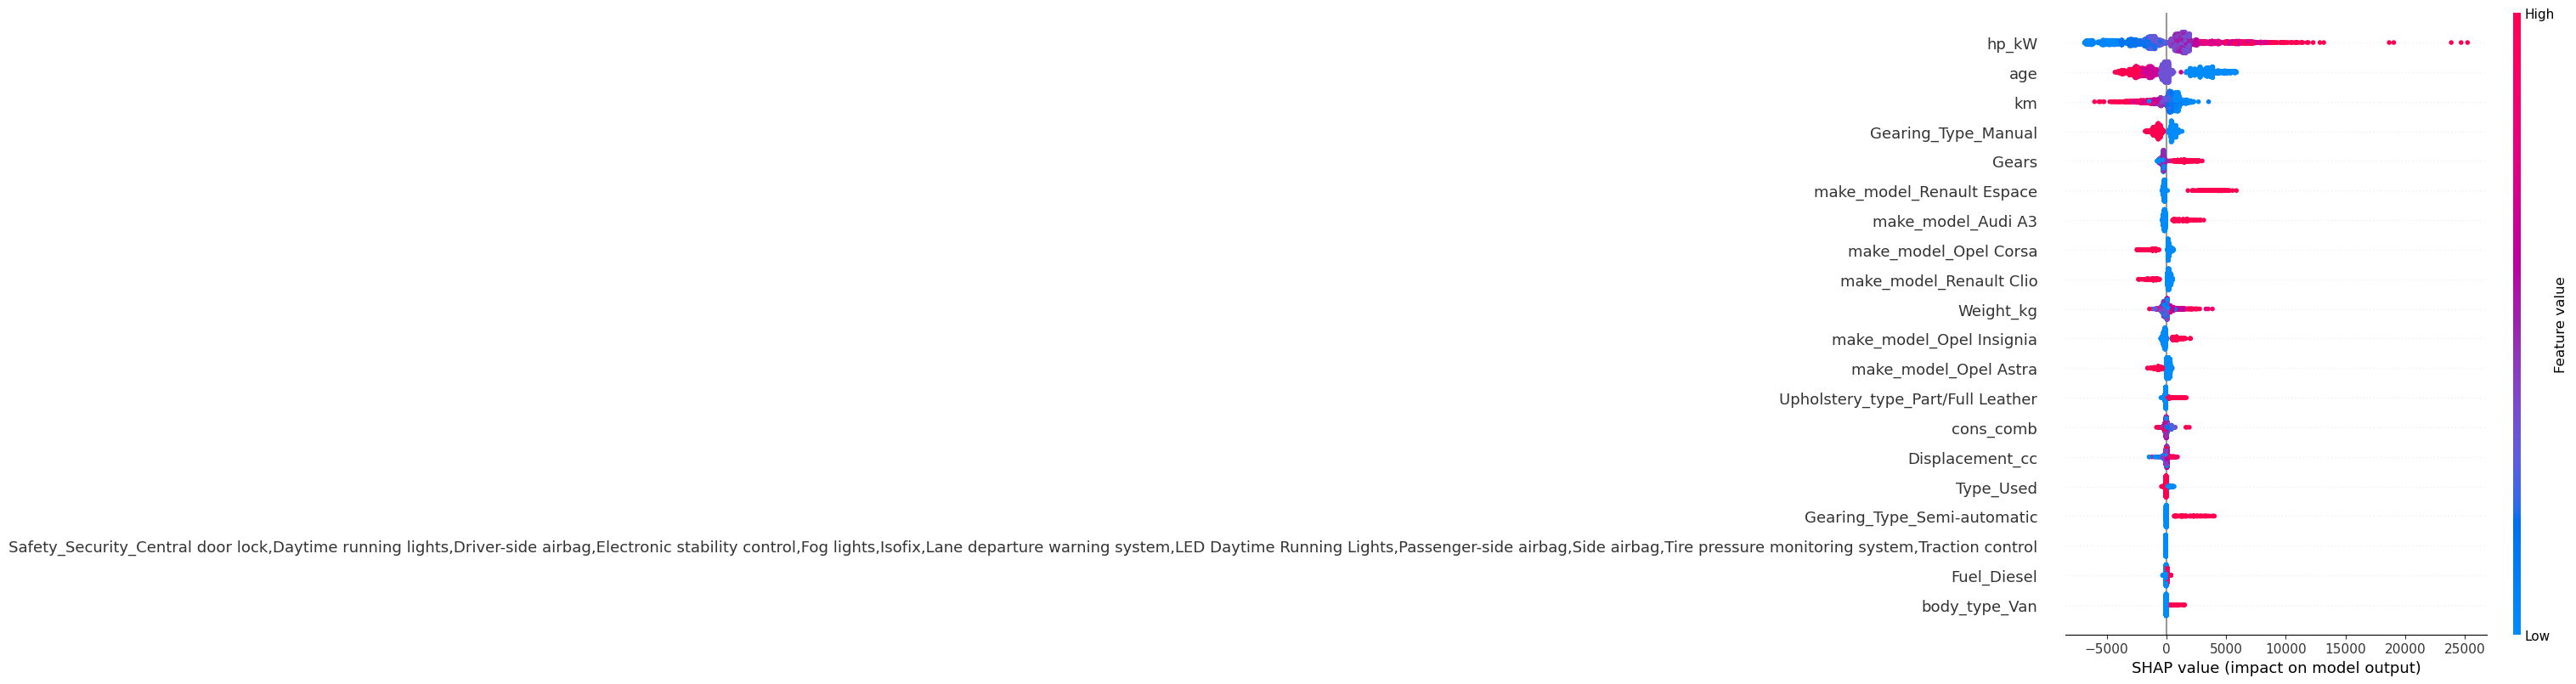

c:\Users\testy\anaconda3\envs\test\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


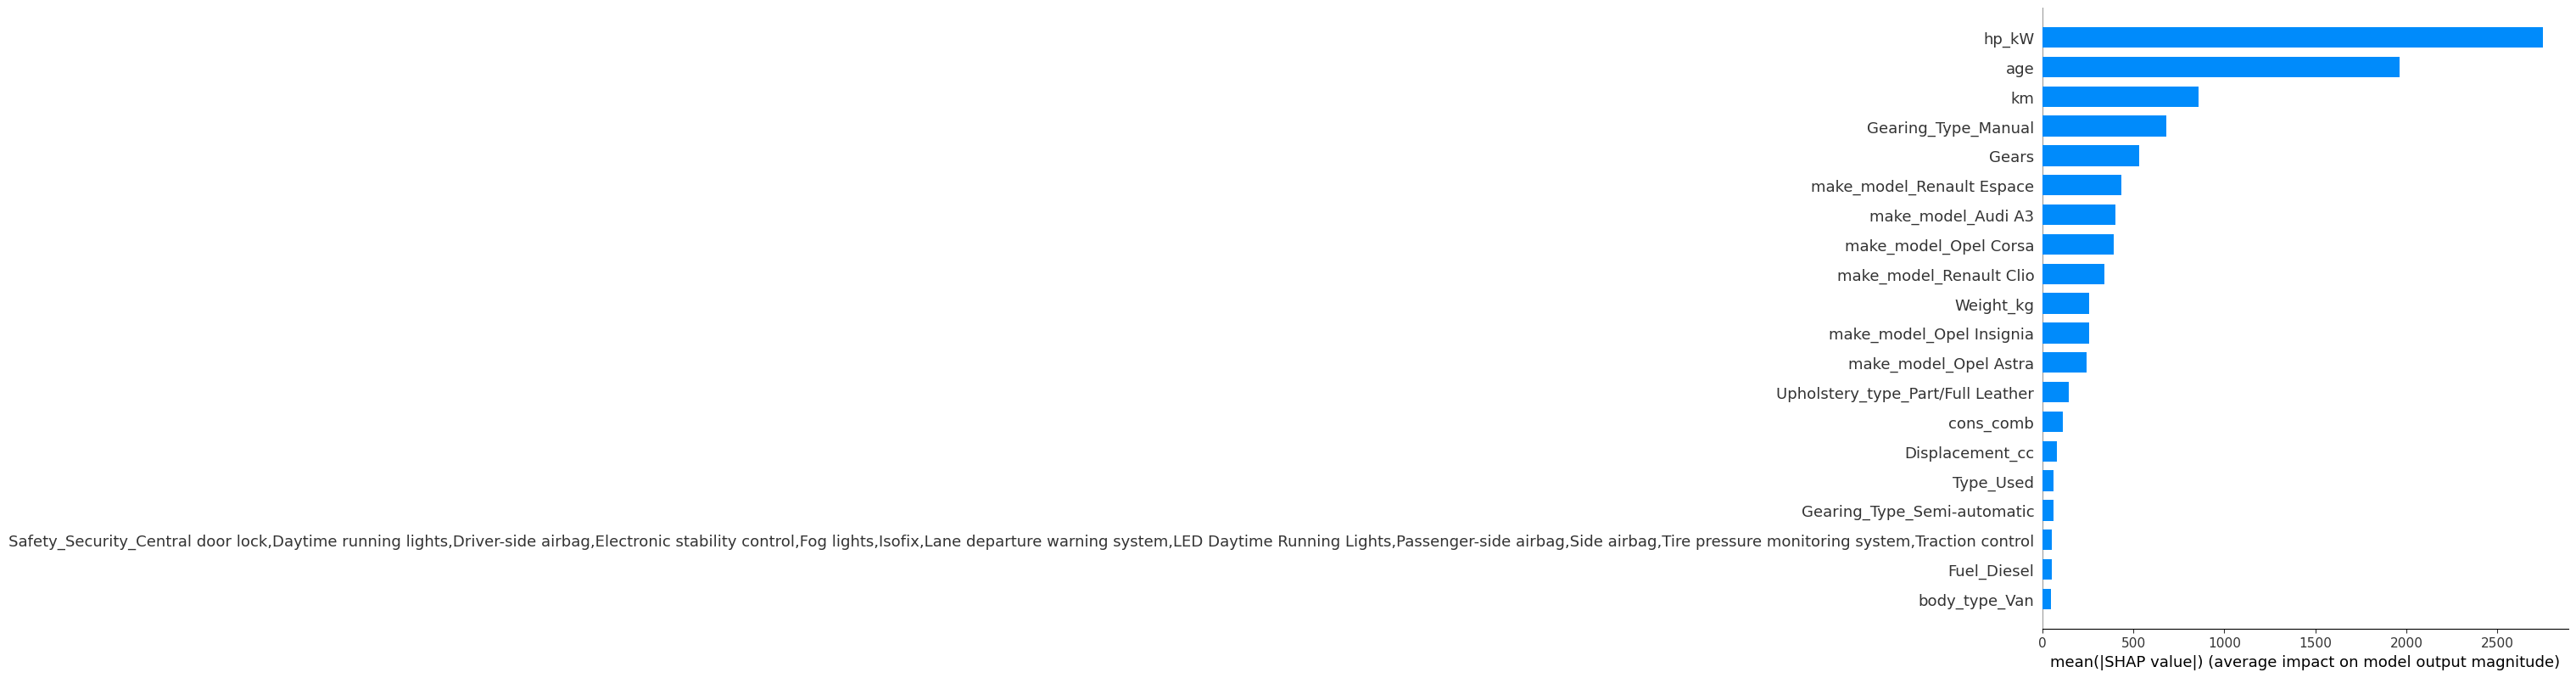

In [21]:
explainer = shap.Explainer(model, X_train_encoded)  # Crea l'explainer SHAP
shap_values = explainer(X_test_encoded) # Calcola i valori SHAP

plt.figure(figsize=(12, 8))  # Aumenta le dimensioni a piacere
shap.summary_plot(shap_values, X_test_encoded)
shap.plots.bar(shap_values)  # Usa un bar plot per una visualizzazione più semplice
  # Salva il grafico come immagine

# **Visualizzazione 1: SHAP Summary Plot**
shap.summary_plot(shap_values, X_test_encoded)

# **Visualizzazione 2: SHAP Bar Plot (Importanza delle feature)**
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

In [22]:
def generate_shap_explanation(shap_values, features, feature_names):
    explanation = "La previsione è stata influenzata principalmente da:\n"
    # Ordina le caratteristiche per l'impatto assoluto decrescente
    indices = np.argsort(-np.abs(shap_values))
    for i in indices:
        if shap_values[i] != 0:
            effect = "aumentato" if shap_values[i] > 0 else "diminuito"
            explanation += f"- {feature_names[i]} ha {effect} la previsione di {abs(shap_values[i]):.2f} punti.\n"
    return explanation

# Supponi di avere i valori SHAP e le caratteristiche per un singolo esempio
single_shap_values = shap_values[0]
features_example = X_test_encoded.iloc[0]
feature_names = X_test_encoded.columns

# Genera e stampa la spiegazione
print(generate_shap_explanation(single_shap_values.values, features_example, feature_names))


La previsione è stata influenzata principalmente da:
- age ha aumentato la previsione di 5164.95 punti.
- hp_kW ha aumentato la previsione di 2070.43 punti.
- make_model_Opel Insignia ha aumentato la previsione di 1559.31 punti.
- Weight_kg ha aumentato la previsione di 1101.64 punti.
- km ha aumentato la previsione di 899.81 punti.
- Gearing_Type_Manual ha diminuito la previsione di 812.90 punti.
- Displacement_cc ha aumentato la previsione di 694.77 punti.
- make_model_Renault Clio ha aumentato la previsione di 332.02 punti.
- make_model_Opel Astra ha aumentato la previsione di 300.74 punti.
- make_model_Opel Corsa ha aumentato la previsione di 206.53 punti.
- make_model_Renault Espace ha diminuito la previsione di 198.24 punti.
- Fuel_Diesel ha aumentato la previsione di 198.03 punti.
- Upholstery_type_Part/Full Leather ha diminuito la previsione di 189.48 punti.
- Gears ha diminuito la previsione di 112.57 punti.
- make_model_Audi A3 ha diminuito la previsione di 90.56 punti.
- con

## Confronto tra i modelli
Arrivati a questo punto, abbiamo confrontato le metriche prestazionali dei vari modelli di Machine Learning per stabilire quali sono i migliori per il data set in esame.